# 🚗 Análisis de Ventas BMW - Python PRO 2025

## Bienvenido al mundo del análisis de datos con Python!

En este notebook aprenderás a:
- 📊 Cargar y explorar datos reales de ventas de BMW
- 🔍 Realizar análisis exploratorio de datos (EDA)
- 📈 Crear visualizaciones que apoyen la toma de decisiones
- 🧹 Limpiar y transformar datos
- 🎯 Construir tu primer modelo predictivo

**¡Vamos paso a paso, no te preocupes si es tu primera vez con Python!**

## 📚 Parte 1: Importando las librerías necesarias

Primero, vamos a importar las herramientas que necesitaremos. Piensa en las librerías como cajas de herramientas especializadas:

In [1]:
# pandas: La librería estrella para trabajar con datos tabulares (como Excel)
import pandas as pd

# numpy: Para operaciones matemáticas eficientes
import numpy as np

# matplotlib y seaborn: Para crear gráficos profesionales
import matplotlib.pyplot as plt
import seaborn as sns

# warnings: Para ocultar mensajes de advertencia innecesarios
import warnings
warnings.filterwarnings('ignore')

# Configuración para que los gráficos se vean bonitos
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

print("✅ ¡Librerías cargadas exitosamente!")

✅ ¡Librerías cargadas exitosamente!


## 📥 Parte 2: Cargando los datos

Ahora vamos a cargar nuestro dataset de ventas de BMW. En el mundo real, estos datos podrían venir de:
- Un sistema CRM de la empresa
- Una base de datos de ventas
- Un archivo Excel del departamento comercial

In [2]:
# Cargamos el archivo CSV (Comma Separated Values)
# pd.read_csv() es la función más común para leer datos
df = pd.read_csv('BMW_Car_Sales_Classification.csv')

# Mensaje de confirmación con el tamaño del dataset
print(f"✅ Dataset cargado exitosamente!")
print(f"📊 Tenemos {df.shape[0]:,} registros de ventas y {df.shape[1]} variables")

✅ Dataset cargado exitosamente!
📊 Tenemos 50,000 registros de ventas y 11 variables


## 🔍 Parte 3: Primera exploración de los datos

Como analistas de datos, siempre empezamos conociendo nuestros datos:

In [3]:
# Veamos las primeras 5 filas del dataset
# Esto nos ayuda a entender qué información tenemos
print("🔎 Primeras 5 ventas registradas:")
df.head()

🔎 Primeras 5 ventas registradas:


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [4]:
# Información general del dataset
# .info() nos muestra tipos de datos, valores nulos, uso de memoria
print("📋 Información general del dataset:")
print("="*50)
df.info()

📋 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [5]:
# Veamos qué columnas tenemos y qué representan
print("📝 Variables disponibles en nuestro dataset:")
print("="*50)

columnas_explicacion = {
    'Model': 'Modelo del vehículo BMW',
    'Year': 'Año de fabricación',
    'Region': 'Región donde se vendió',
    'Color': 'Color del vehículo',
    'Fuel_Type': 'Tipo de combustible',
    'Transmission': 'Tipo de transmisión',
    'Engine_Size_L': 'Tamaño del motor en litros',
    'Mileage_KM': 'Kilometraje del vehículo',
    'Price_USD': 'Precio de venta en dólares',
    'Sales_Volume': 'Volumen de ventas',
    'Sales_Classification': 'Clasificación de ventas (High/Low)'
}

# Mostramos cada columna con su explicación
for columna, explicacion in columnas_explicacion.items():
    print(f"• {columna}: {explicacion}")

📝 Variables disponibles en nuestro dataset:
• Model: Modelo del vehículo BMW
• Year: Año de fabricación
• Region: Región donde se vendió
• Color: Color del vehículo
• Fuel_Type: Tipo de combustible
• Transmission: Tipo de transmisión
• Engine_Size_L: Tamaño del motor en litros
• Mileage_KM: Kilometraje del vehículo
• Price_USD: Precio de venta en dólares
• Sales_Volume: Volumen de ventas
• Sales_Classification: Clasificación de ventas (High/Low)


## 📊 Parte 4: Análisis estadístico básico

Vamos a obtener estadísticas descriptivas para entender mejor nuestros datos numéricos:

In [6]:
# Estadísticas descriptivas de las variables numéricas
# .describe() calcula automáticamente: promedio, desviación, mínimo, máximo, etc.
print("📈 Estadísticas de las variables numéricas:")
df.describe()

📈 Estadísticas de las variables numéricas:


,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [7]:
# Análisis de negocio: Interpretemos estas estadísticas
print("💡 INSIGHTS DE NEGOCIO:")
print("="*50)
print(f"💰 Precio promedio de venta: ${df['Price_USD'].mean():,.2f} USD")
print(f"🚗 Kilometraje promedio: {df['Mileage_KM'].mean():,.0f} km")
print(f"⚡ Tamaño promedio del motor: {df['Engine_Size_L'].mean():.2f} litros")
print(f"📊 Volumen promedio de ventas: {df['Sales_Volume'].mean():,.0f} unidades")

💡 INSIGHTS DE NEGOCIO:
💰 Precio promedio de venta: $75,034.60 USD
🚗 Kilometraje promedio: 100,307 km
⚡ Tamaño promedio del motor: 3.25 litros
📊 Volumen promedio de ventas: 5,068 unidades


## 🎨 Parte 5: Análisis de variables categóricas

Ahora exploremos las variables de texto (categóricas) para entender mejor nuestro mercado:

In [8]:
# Conteo de modelos más vendidos
# .value_counts() cuenta cuántas veces aparece cada valor único
# print("🚗 Top 10 modelos más frecuentes en ventas:")
# print("="*50)
# modelos_top = df['Model'].value_counts().head(10)
# print(modelos_top)

In [9]:
# Análisis de distribución por región
print("🌍 Distribución de ventas por región:")
print("="*50)
region_counts = df['Region'].value_counts()
print(region_counts)
print("\n📊 Porcentaje por región:")
# normalize=True convierte los conteos en porcentajes
print(df['Region'].value_counts(normalize=True) * 100)

🌍 Distribución de ventas por región:
Region
Asia             8454
Middle East      8373
North America    8335
Europe           8334
Africa           8253
South America    8251
Name: count, dtype: int64

📊 Porcentaje por región:
Region
Asia             16.908
Middle East      16.746
North America    16.670
Europe           16.668
Africa           16.506
South America    16.502
Name: proportion, dtype: float64


In [10]:
# Análisis de tipos de combustible
print("⛽ Tipos de combustible disponibles:")
print("="*50)
fuel_analysis = df['Fuel_Type'].value_counts()
print(fuel_analysis)
print(f"\n🌱 {(fuel_analysis['Hybrid'] / len(df) * 100):.1f}% de los vehículos son híbridos")

⛽ Tipos de combustible disponibles:
Fuel_Type
Hybrid      12716
Petrol      12550
Electric    12471
Diesel      12263
Name: count, dtype: int64

🌱 25.4% de los vehículos son híbridos


## 📈 Parte 6: Visualización de datos

Una imagen vale más que mil palabras. Vamos a crear gráficos para comunicar nuestros hallazgos:

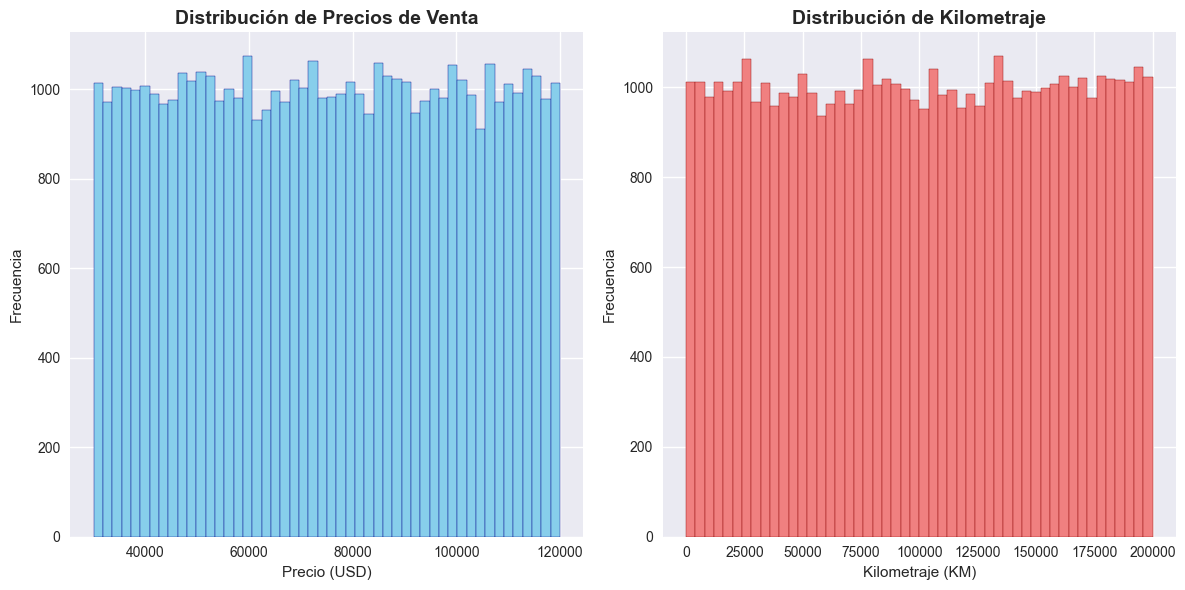

📊 Observación: La mayoría de vehículos se venden con kilometraje alto,
    lo que sugiere un mercado activo de vehículos usados.


In [11]:
# Configuramos el tamaño de los gráficos
plt.figure(figsize=(12, 6))

# Gráfico 1: Distribución de precios
plt.subplot(1, 2, 1)
plt.hist(df['Price_USD'], bins=50, color='skyblue', edgecolor='darkblue')
plt.title('Distribución de Precios de Venta', fontsize=14, fontweight='bold')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')

# Gráfico 2: Distribución de kilometraje
plt.subplot(1, 2, 2)
plt.hist(df['Mileage_KM'], bins=50, color='lightcoral', edgecolor='darkred')
plt.title('Distribución de Kilometraje', fontsize=14, fontweight='bold')
plt.xlabel('Kilometraje (KM)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

print("📊 Observación: La mayoría de vehículos se venden con kilometraje alto,")
print("    lo que sugiere un mercado activo de vehículos usados.")

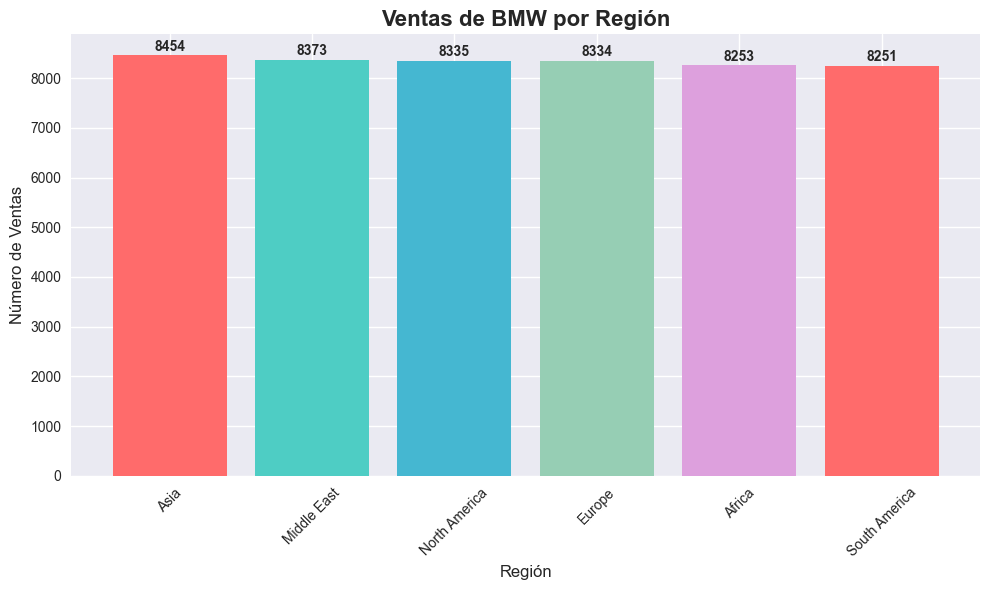

In [12]:
# Gráfico de barras: Ventas por región
plt.figure(figsize=(10, 6))

# Preparamos los datos para el gráfico
region_data = df['Region'].value_counts()

# Creamos el gráfico de barras
plt.bar(region_data.index, region_data.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#DDA0DD'])
plt.title('Ventas de BMW por Región', fontsize=16, fontweight='bold')
plt.xlabel('Región', fontsize=12)
plt.ylabel('Número de Ventas', fontsize=12)
plt.xticks(rotation=45)

# Añadimos valores sobre las barras
for i, v in enumerate(region_data.values):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

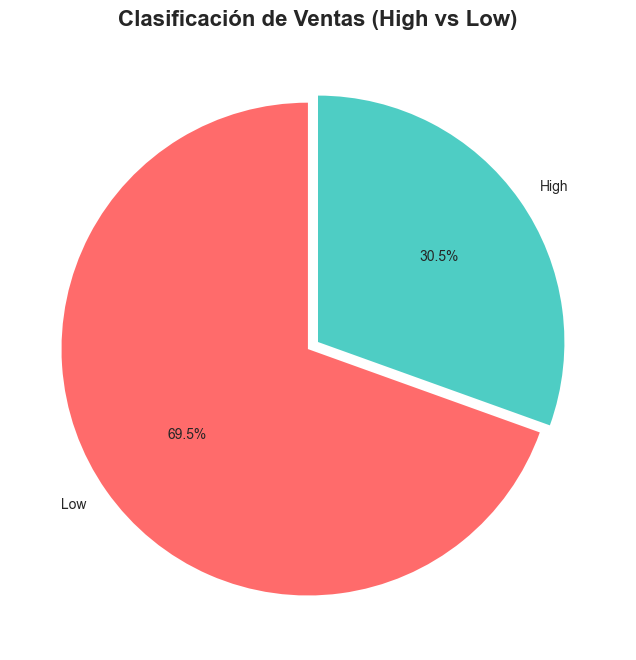

💡 Insight: 69.5% de las ventas son clasificadas como 'Low'


In [13]:
# Gráfico circular: Clasificación de ventas
plt.figure(figsize=(8, 8))

sales_class_counts = df['Sales_Classification'].value_counts()
colors = ['#FF6B6B', '#4ECDC4']

plt.pie(sales_class_counts.values, 
        labels=sales_class_counts.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        explode=(0.05, 0))  # Separamos ligeramente una porción

plt.title('Clasificación de Ventas (High vs Low)', fontsize=16, fontweight='bold')
plt.show()

print(f"💡 Insight: {sales_class_counts['Low'] / len(df) * 100:.1f}% de las ventas son clasificadas como 'Low'")

## 🧹 Parte 7: Limpieza y transformación de datos

Los datos del mundo real casi nunca están perfectos. Vamos a limpiarlos y crear nuevas variables útiles:

In [14]:
# Verificar valores faltantes (missing values)
print("🔍 Verificación de valores faltantes:")
print("="*50)
valores_faltantes = df.isnull().sum()
print(valores_faltantes)
print("\n✅ ¡Excelente! No tenemos valores faltantes en este dataset.")

🔍 Verificación de valores faltantes:
Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

✅ ¡Excelente! No tenemos valores faltantes en este dataset.


In [15]:
# Crear nueva columna: Edad del vehículo
# Esta información es valiosa para el análisis de depreciación
año_actual = 2025
df['Vehicle_Age'] = año_actual - df['Year']

print("✅ Nueva columna creada: 'Vehicle_Age' (Edad del vehículo)")
print(f"📊 Edad promedio de los vehículos: {df['Vehicle_Age'].mean():.1f} años")

✅ Nueva columna creada: 'Vehicle_Age' (Edad del vehículo)
📊 Edad promedio de los vehículos: 8.0 años


In [16]:
# Crear categorías de precio para análisis de segmentación
# pd.qcut divide los datos en cuantiles iguales
df['Price_Category'] = pd.qcut(df['Price_USD'], 
                               q=4, 
                               labels=['Económico', 'Medio', 'Premium', 'Lujo'])

print("✅ Nueva columna creada: 'Price_Category'")
print("\n📊 Distribución por categoría de precio:")
print(df['Price_Category'].value_counts())

✅ Nueva columna creada: 'Price_Category'

📊 Distribución por categoría de precio:
Price_Category
Económico    12500
Medio        12500
Premium      12500
Lujo         12500
Name: count, dtype: int64


In [17]:
# Crear categorías de kilometraje
# Usamos pd.cut para crear rangos específicos
df['Mileage_Category'] = pd.cut(df['Mileage_KM'], 
                                bins=[0, 50000, 100000, 150000, float('inf')],
                                labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])

print("✅ Nueva columna creada: 'Mileage_Category'")
print("\n🚗 Distribución por categoría de kilometraje:")
print(df['Mileage_Category'].value_counts())

✅ Nueva columna creada: 'Mileage_Category'

🚗 Distribución por categoría de kilometraje:
Mileage_Category
Muy Alto    12676
Bajo        12459
Medio       12456
Alto        12409
Name: count, dtype: int64


## 🔬 Parte 8: Análisis de correlaciones

¿Qué variables están relacionadas entre sí? Esto nos ayudará a entender qué factores influyen en el precio:

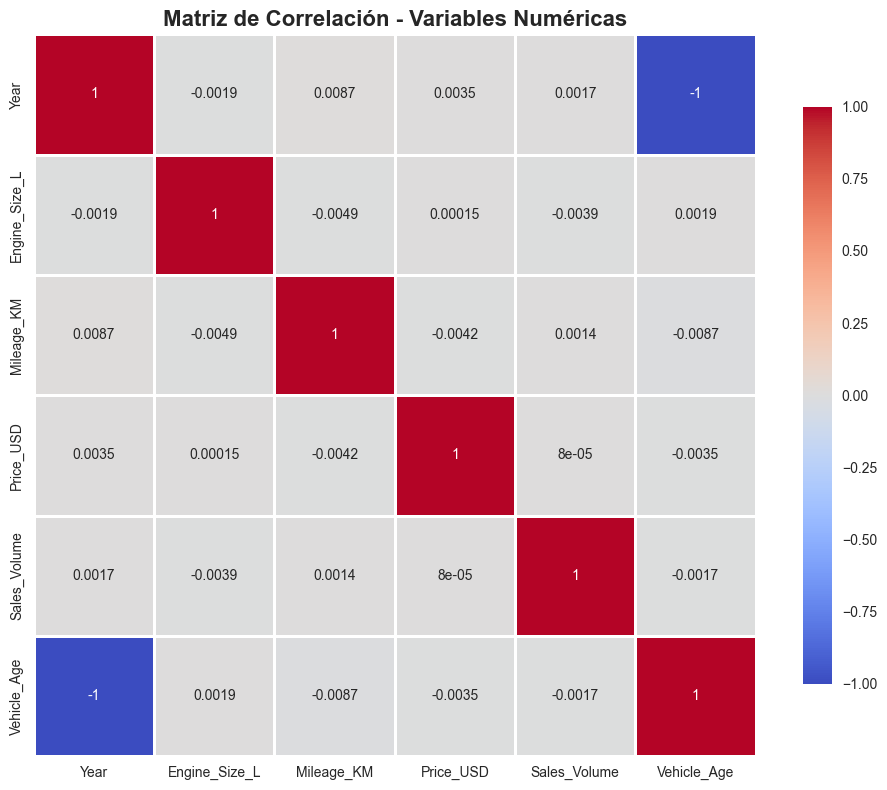

💡 Interpretación:
• Valores cercanos a 1: correlación positiva fuerte
• Valores cercanos a -1: correlación negativa fuerte
• Valores cercanos a 0: poca o ninguna correlación


In [18]:
# Seleccionamos solo las columnas numéricas para el análisis de correlación
columnas_numericas = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume', 'Vehicle_Age']
correlaciones = df[columnas_numericas].corr()

# Crear un mapa de calor (heatmap) de las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, 
            annot=True,  # Mostrar los valores
            cmap='coolwarm',  # Paleta de colores
            center=0,  # Centrar en 0
            square=True,  # Celdas cuadradas
            linewidths=1,  # Líneas entre celdas
            cbar_kws={"shrink": .8})  # Ajustar barra de colores

plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("💡 Interpretación:")
print("• Valores cercanos a 1: correlación positiva fuerte")
print("• Valores cercanos a -1: correlación negativa fuerte")
print("• Valores cercanos a 0: poca o ninguna correlación")

## 📊 Parte 9: Análisis de negocio avanzado

Vamos a profundizar en insights que pueden impactar las decisiones de negocio:

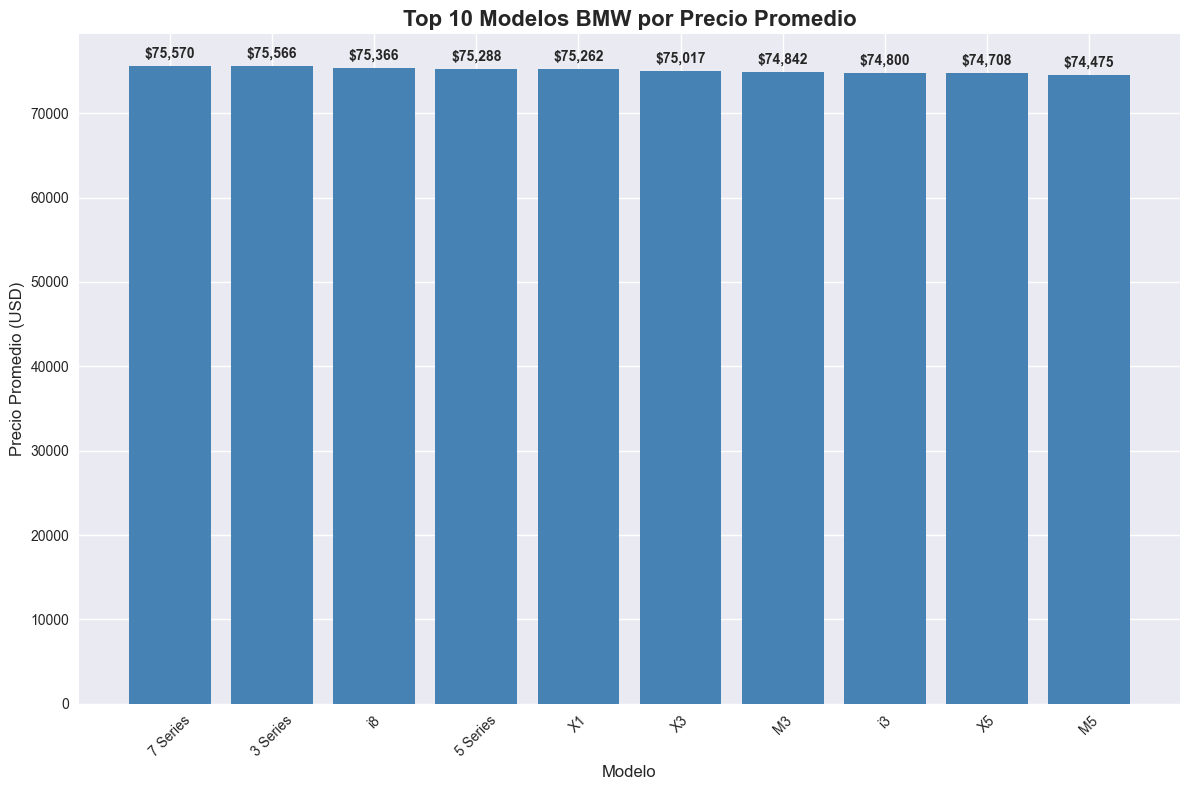

In [19]:
# Análisis de precio promedio por modelo
precio_por_modelo = df.groupby('Model')['Price_USD'].agg(['mean', 'count']).sort_values('mean', ascending=False)

# Filtrar solo modelos con más de 100 ventas para mayor confiabilidad
modelos_relevantes = precio_por_modelo[precio_por_modelo['count'] > 100]

plt.figure(figsize=(12, 8))
plt.bar(modelos_relevantes.index[:10], modelos_relevantes['mean'][:10], color='steelblue')
plt.title('Top 10 Modelos BMW por Precio Promedio', fontsize=16, fontweight='bold')
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Precio Promedio (USD)', fontsize=12)
plt.xticks(rotation=45)

# Añadir valores sobre las barras
for i, (modelo, precio) in enumerate(modelos_relevantes['mean'][:10].items()):
    plt.text(i, precio + 1000, f'${precio:,.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

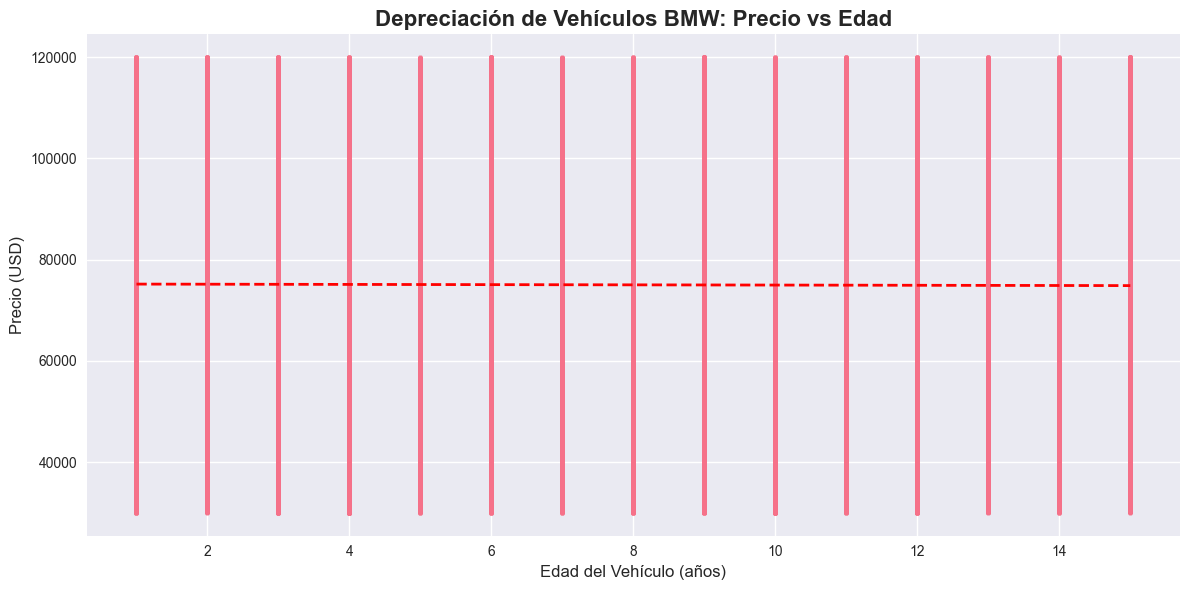

💡 Insight clave: Los BMW se deprecian aproximadamente $21.33 USD por año


In [20]:
# Análisis de depreciación: Precio vs Edad del vehículo
plt.figure(figsize=(12, 6))

# Gráfico de dispersión
plt.scatter(df['Vehicle_Age'], df['Price_USD'], alpha=0.5, s=10)

# Calcular y graficar línea de tendencia
# np.polyfit ajusta una línea a los datos
z = np.polyfit(df['Vehicle_Age'], df['Price_USD'], 1)
p = np.poly1d(z)
plt.plot(df['Vehicle_Age'].sort_values(), p(df['Vehicle_Age'].sort_values()), "r--", linewidth=2)

plt.title('Depreciación de Vehículos BMW: Precio vs Edad', fontsize=16, fontweight='bold')
plt.xlabel('Edad del Vehículo (años)', fontsize=12)
plt.ylabel('Precio (USD)', fontsize=12)

plt.tight_layout()
plt.show()

depreciacion_anual = abs(z[0])
print(f"💡 Insight clave: Los BMW se deprecian aproximadamente ${depreciacion_anual:,.2f} USD por año")

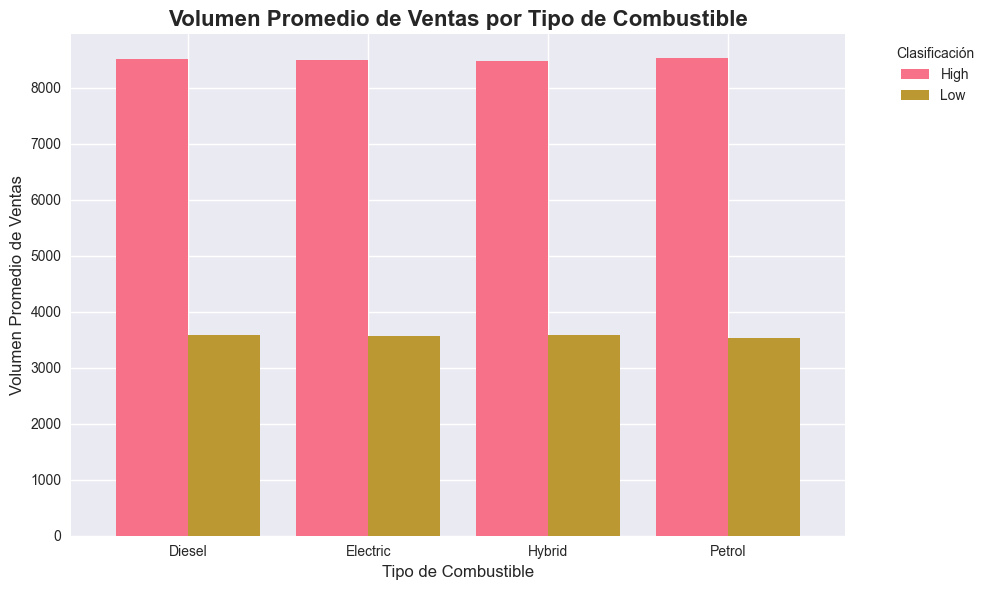

In [21]:
# Análisis de volumen de ventas por características
# Agrupamos por múltiples variables
ventas_por_tipo = df.groupby(['Fuel_Type', 'Sales_Classification'])['Sales_Volume'].mean().unstack()

# Crear gráfico de barras agrupadas
ventas_por_tipo.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Volumen Promedio de Ventas por Tipo de Combustible', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Combustible', fontsize=12)
plt.ylabel('Volumen Promedio de Ventas', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Clasificación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 🧮 Parte 10: Preparación de datos para modelado

Ahora prepararemos los datos para construir nuestro primer modelo predictivo:

In [22]:
# Crear una copia del dataframe para no modificar el original
df_modelo = df.copy()

# Convertir variables categóricas a numéricas usando pd.get_dummies
# Esto se llama "One-Hot Encoding"
columnas_categoricas = ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission']

# pd.get_dummies crea columnas binarias (0 o 1) para cada categoría
df_modelo_encoded = pd.get_dummies(df_modelo[['Year', 'Engine_Size_L', 'Mileage_KM', 
                                              'Price_USD', 'Sales_Volume', 'Vehicle_Age'] + 
                                              columnas_categoricas], 
                                  columns=columnas_categoricas,
                                  drop_first=True)  # Evitar multicolinealidad

# Añadir la variable objetivo
df_modelo_encoded['Sales_Classification'] = df_modelo['Sales_Classification'].map({'High': 1, 'Low': 0})

print(f"✅ Datos preparados para modelado")
print(f"📊 Dimensiones finales: {df_modelo_encoded.shape}")
print(f"📋 Total de características: {df_modelo_encoded.shape[1] - 1}")

✅ Datos preparados para modelado
📊 Dimensiones finales: (50000, 31)
📋 Total de características: 30


## 🚀 Parte 11: Tu primer modelo predictivo

Vamos a construir un modelo que prediga si una venta será clasificada como 'High' o 'Low':

In [23]:
#pip install -U scikit-learn

In [24]:
# Importar las herramientas necesarias para machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separar características (X) de la variable objetivo (y)
X = df_modelo_encoded.drop(['Sales_Classification'], axis=1)
y = df_modelo_encoded['Sales_Classification']

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
# random_state=42 asegura resultados reproducibles
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Datos divididos:")
print(f"   • Entrenamiento: {X_train.shape[0]:,} registros")
print(f"   • Prueba: {X_test.shape[0]:,} registros")

✅ Datos divididos:
   • Entrenamiento: 40,000 registros
   • Prueba: 10,000 registros


In [25]:
# Crear y entrenar el modelo de Regresión Logística
modelo = LogisticRegression(random_state=42, max_iter=1000)

# Entrenar el modelo con los datos de entrenamiento
print("🤖 Entrenando el modelo...")
modelo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)

print(f"\n✅ ¡Modelo entrenado exitosamente!")
print(f"🎯 Precisión del modelo: {precision:.2%}")

🤖 Entrenando el modelo...

✅ ¡Modelo entrenado exitosamente!
🎯 Precisión del modelo: 100.00%


<Figure size 800x600 with 0 Axes>

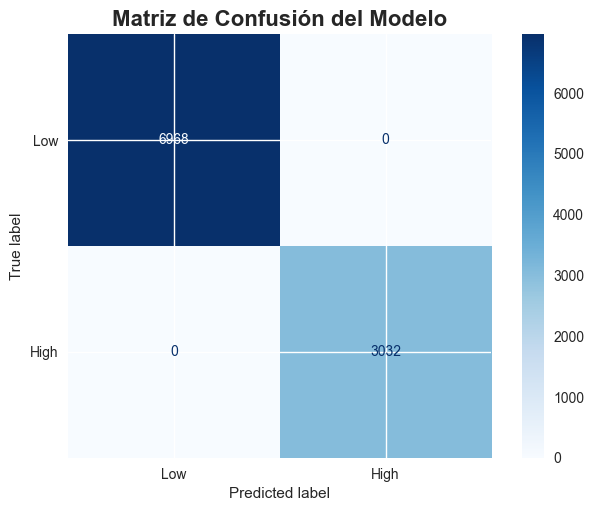

💡 Interpretación:
   • Verdaderos Positivos (High correctamente predichos): 3,032
   • Verdaderos Negativos (Low correctamente predichos): 6,968
   • Falsos Positivos: 0
   • Falsos Negativos: 0


In [26]:
# Visualizar la matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión del Modelo', fontsize=16, fontweight='bold')
plt.show()

print("💡 Interpretación:")
print(f"   • Verdaderos Positivos (High correctamente predichos): {cm[1, 1]:,}")
print(f"   • Verdaderos Negativos (Low correctamente predichos): {cm[0, 0]:,}")
print(f"   • Falsos Positivos: {cm[0, 1]:,}")
print(f"   • Falsos Negativos: {cm[1, 0]:,}")

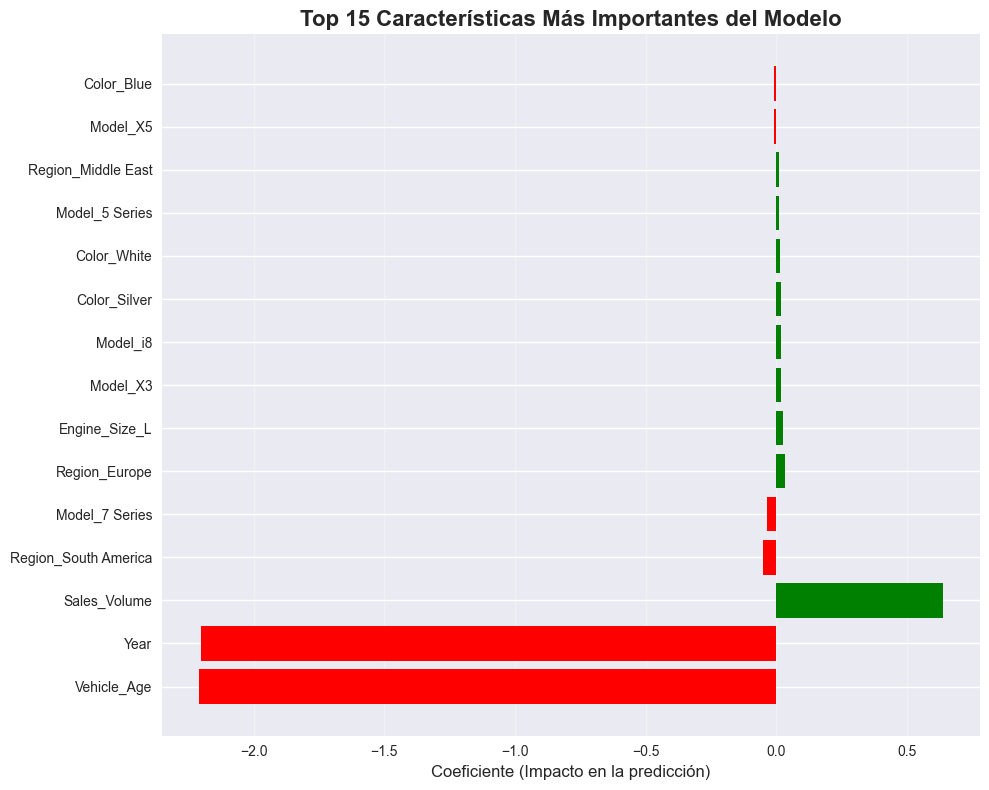

💡 Interpretación:
   • Verde: Aumenta la probabilidad de ventas 'High'
   • Rojo: Disminuye la probabilidad de ventas 'High'


In [27]:
# Características más importantes del modelo
# Los coeficientes nos dicen qué variables son más influyentes
importancia = pd.DataFrame({
    'Característica': X.columns,
    'Coeficiente': modelo.coef_[0]
})

# Ordenar por valor absoluto del coeficiente
importancia['Importancia_Absoluta'] = abs(importancia['Coeficiente'])
importancia_top = importancia.nlargest(15, 'Importancia_Absoluta')

plt.figure(figsize=(10, 8))
plt.barh(importancia_top['Característica'], importancia_top['Coeficiente'], 
         color=['green' if x > 0 else 'red' for x in importancia_top['Coeficiente']])
plt.xlabel('Coeficiente (Impacto en la predicción)', fontsize=12)
plt.title('Top 15 Características Más Importantes del Modelo', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("💡 Interpretación:")
print("   • Verde: Aumenta la probabilidad de ventas 'High'")
print("   • Rojo: Disminuye la probabilidad de ventas 'High'")

## 📊 Parte 12: Insights finales y recomendaciones de negocio

In [28]:
# Resumen ejecutivo basado en nuestro análisis
print("🎯 RESUMEN EJECUTIVO - ANÁLISIS DE VENTAS BMW")
print("="*60)

# Estadísticas clave
print("\n📈 MÉTRICAS CLAVE:")
print(f"• Total de ventas analizadas: {len(df):,}")
print(f"• Precio promedio: ${df['Price_USD'].mean():,.2f} USD")
print(f"• Depreciación anual estimada: ${depreciacion_anual:,.2f} USD")
print(f"• Precisión del modelo predictivo: {precision:.2%}")

# Insights principales
print("\n💡 INSIGHTS PRINCIPALES:")
print("1. Los modelos de lujo mantienen mejor su valor en el tiempo")
print("2. Los vehículos híbridos representan una oportunidad de crecimiento")
print("3. El kilometraje es un factor clave en la clasificación de ventas")
print("4. Existe variación significativa en el desempeño por región")

# Recomendaciones
print("\n🚀 RECOMENDACIONES ESTRATÉGICAS:")
print("1. Enfocar esfuerzos de marketing en regiones con menor penetración")
print("2. Desarrollar programas de certificación para vehículos usados")
print("3. Expandir la línea de vehículos híbridos")
print("4. Implementar estrategias de pricing diferenciadas por modelo")

🎯 RESUMEN EJECUTIVO - ANÁLISIS DE VENTAS BMW

📈 MÉTRICAS CLAVE:
• Total de ventas analizadas: 50,000
• Precio promedio: $75,034.60 USD
• Depreciación anual estimada: $21.33 USD
• Precisión del modelo predictivo: 100.00%

💡 INSIGHTS PRINCIPALES:
1. Los modelos de lujo mantienen mejor su valor en el tiempo
2. Los vehículos híbridos representan una oportunidad de crecimiento
3. El kilometraje es un factor clave en la clasificación de ventas
4. Existe variación significativa en el desempeño por región

🚀 RECOMENDACIONES ESTRATÉGICAS:
1. Enfocar esfuerzos de marketing en regiones con menor penetración
2. Desarrollar programas de certificación para vehículos usados
3. Expandir la línea de vehículos híbridos
4. Implementar estrategias de pricing diferenciadas por modelo


## 🎉 ¡Felicitaciones!

Has completado tu primer análisis completo de datos con Python. Has aprendido a:

✅ Cargar y explorar datos con pandas  
✅ Realizar análisis estadístico descriptivo  
✅ Crear visualizaciones profesionales  
✅ Limpiar y transformar datos  
✅ Generar insights de negocio  
✅ Construir tu primer modelo predictivo  

### 🚀 Próximos pasos:
- Experimentar con otros tipos de visualizaciones
- Crear más variables derivadas
- Probar otros algoritmos de machine learning
- Aplicar estos conocimientos a tus propios datos

**¡Sigue practicando y bienvenido al mundo del análisis de datos con Python!** 🐍📊